**Imports and includes**

In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys
import glob

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment analysis function provided by Upasana**

In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Create list of all Baseline Users**

In [5]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [6]:
UserList = ['rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'FoxNews',
 'runnersworld',
 'PeterSchiff',
 'TechCrunch',
 'jtimberlake',
 'InspiringThinkn',
 'ggreenwald',
 'KellyO',
 'BoyGeorge',
 'Timcast',
 'MichaelSkolnik',
 'JasonMillerinDC',
 'derekhough',
 'HouseGOP',
 'myfabolouslife',
 'victoriabeckham',
 'BettyBowers',
 'MensHealthMag',
 'RT_America',
 'KurtSchlichter',
 'joshrogin',
 'KrisJenner',
 'TwitterGov',
 'OfficialMelB',
 'ABCWorldNews',
 'flightradar24',
 'ABC7NY',
 'France24_en',
 'ABC7NY',
 'France24_en',
 'rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'FoxNews',
 'runnersworld',
 'PeterSchiff',
 'TechCrunch',
 'jtimberlake',
 'InspiringThinkn',
 'ggreenwald',
 'KellyO',
 'BoyGeorge',
 'Timcast',
 'MichaelSkolnik',
 'JasonMillerinDC',
 'derekhough',
 'HouseGOP',
 'myfabolouslife',
 'victoriabeckham',
 'BettyBowers',
 'MensHealthMag',
 'RT_America',
 'KurtSchlichter',
 'joshrogin',
 'KrisJenner',
 'TwitterGov',
 'OfficialMelB',
 'ABCWorldNews',
 'flightradar24',
 'JedediahBila',
 'MariaSharapova',
 'SportsCenter',
 'JeffFlake',
 'AJEnglish',
 'Tom_Bergeron',
 'greta',
 'KatTimpf',
 'wyclef',
 'RiceGum',
 'edhelms',
 'AnonPress',
 'SkyNews',
 'LindseyGrahamSC',
 'SharylAttkisson',
 'trailblazers',
 'OnionSports',
 'RobBrydon',
 'DailyMail',
 'ENERGY',
 'JoelMadden',
 'OK_Magazine',
 'CLewandowski_',
 'maziehirono',
 'SenBobCasey',
 'JonahDispatch',
 'HillaryClinton',
 'Telegraph',
 'SpeakerBoehner',
 'Gizmodo',
 'PittsburghPG',
 'WORLDSTAR',
 'rosemcgowan',
 'ananavarro',
 'Newsday',
 'steph93065',
 'kerrywashington',
 'Sarah_Hyland',
 'SenJeffMerkley',
 'PlayStation',
 'PattyMurray',
 'RevRunWisdom',
 'NolteNC',
 'Playboy',
 'newrepublic',
 'MeetThePress',
 'blakehounshell',
 'Comey',
 'JustJared',
 'RockChristopher',
 'BruceVH',
 'YNB',
 'SethAbramson',
 '2morrowknight',
 'nycjim',
 'JohnKasich',
 'davidschneider',
 'jasoninthehouse',
 'ThisWeekABC',
 'HeatherChilders',
 'LMKMovieManiac',
 'MaxBlumenthal',
 'TeaPainUSA',
 'vicenews',
 'SenatorCollins',
 'MPRnews',
 'NYTHealth',
 'MailOnline',
 'chrislhayes',
 'the_USO',
 'SirPatStew',
 'maddow',
 'TheOfficerTatum',
 'realmadriden',
 'diggy_simmons',
 'CNET',
 'mitchellreports',
 'NYMag',
 'thejournal_ie',
 'i_D',
 'matthewamiller',
 'bennyjohnson',
 'TheEllenShow',
 'Eurovision',
 'Blavity',
 'nytpolitics',
 'ByronYork',
 'TomFitton',
 'CNNent',
 'airnewsalerts',
 'MarkSimoneNY',
 'DailyCaller',
 'gsuite',
 '60Minutes',
 'lhfang',
 'SenateGOP',
 'Drakee_YMCMB',
 'mkhammer',
 'bjpenndotcom',
 'senatemajldr',
 'FLOTUS44',
 'RVAwonk',
 'MattWalshBlog',
 'Acosta',
 'ScottAdamsSays',
 'HomeAdore',
 'LupeFiasco',
 'AnnCoulter',
 'TheTimMcGraw',
 'Caitlyn_Jenner',
 'vj44',
 'JamesMelville',
 'MusicLov3rzRdo',
 'KameronBennett',
 'KatrinaNation',
 'chuckwoolery',
 'LindaSuhler',
 'CNN',
 'MichelleObama',
 'NATO',
 'kellyoxford',
 'lisamurkowski',
 '9GAG',
 'benyt',
 'NYGovCuomo',
 'RyanSeacrest',
 'SenatorReid',
 'tedcruz',
 'brianstelter',
 'StephenMangan',
 'MikeTyson',
 'CNNBusiness',
 'GovChristie',
 'nycgov',
 'ItsDLS',
 'FreedomWorks',
 'LOLGOP',
 'RottenTomatoes',
 'Eminem',
 'ITV',
 'FRANCE24',
 'RealClearNews',
 'FifthHarmony',
 '20committee',
 'funnyordie',
 'NeNeLeakes',
 'VictoriaOsteen',
 'HuffPost',
 'samstein',
 'thedailybeast',
 'KChenoweth',
 'andersoncooper',
 'jimmykimmel',
 'StephenKing',
 'ChrisCuomo',
 'CassiniSaturn',
 'Bencjacobs',
 'nytimes',
 'VP44',
 'bjnovak',
 'Schwarzenegger',
 'McJesse',
 'amandaseales',
 'KenDilanianNBC',
 'RubinReport',
 'KellyOsbourne',
 'blakeshelton',
 'BuzzFeedNews',
 'Cosmopolitan',
 'WayneDupreeShow',
 'KatiePavlich',
 'ELLEmagazine',
 'USTreasury',
 'AC360',
 'Kaepernick7',
 'TheDailyEdge',
 'RobLowe',
 'Scaramucci',
 'VICEUK',
 'PaulaReidCBS',
 'AprilDRyan',
 'usainbolt',
 'KenRoth',
 'BethMooreLPM',
 'PhillyInquirer',
 'MartinOMalley',
 'narendramodi',
 'ItsMeDeaner',
 'InStyle',
 'MikeBloomberg',
 'ConanOBrien',
 'TuckerCarlson',
 'FiveRights',
 'nytimesworld',
 'NBCNightlyNews',
 'dodo',
 'ChaelSonnen',
 'SenGillibrand',
 'hughhewitt',
 'stillgray',
 'nickconfessore',
 'ColorOfChange',
 'ANCALERTS',
 'DanaPerino',
 'MarthaStewart',
 'trendhunter',
 'CNBCTV18Live',
 'MoveOn',
 'jimmyfallon',
 'ksdknews',
 'linkinpark',
 'CareerBuilder',
 '7NewsSydney',
 'DrJasonJohnson',
 'HeyTammyBruce',
 'xychelsea',
 'passantino',
 'benedictevans',
 'THEHermanCain',
 'UKParliament',
 'Mike_Pence',
 'BBCSport',
 'jk_rowling',
 'Drake',
 'DaveSumter',
 'PerezHilton',
 'TheRickWilson',
 'USATODAY',
 'KevinHart4real',
 'mariamenounos',
 'AllenWest',
 'ZacharyQuinto',
 'alisonjardine',
 'sbg1',
 'JesseBWatters',
 'CBSPolitics',
 'esquire',
 'jonfavs',
 'OgbeniDipo',
 'MeghanMcCain',
 'brookeburke',
 'DailyMailUK',
 'Independent',
 'StephenCurry30',
 'marklevinshow',
 'YourAnonNews',
 'KatrinaPierson',
 'GOPLeader',
 'Morning_Joe',
 'Raiders',
 'highsnobiety',
 'janetmock',
 'WhoWhatWear',
 'VanityFair',
 'megynkelly',
 'cnnbrk',
 'SenatorTimScott',
 'FallonTonight',
 'LilaGraceRose',
 'hitRECordJoe',
 'Dannythefink',
 'lohanthony',
 'Varneyco',
 'splinter_news',
 'afneil',
 'bpolitics',
 'Alhamdhulillaah',
 'amnestyusa',
 'KFILE',
 'LaraLeaTrump',
 'Jaguars',
 'budweiserusa',
 'cher',
 'gerardway',
 'zaibatsu',
 'rgay',
 'MichaelCoudrey',
 'mtracey',
 'virginmedia',
 'WipeHomophobia',
 'LittleMix',
 'donttrythis',
 'GoogleExpertUK',
 'fox5dc',
 'Bakari_Sellers',
 'jessicaalba',
 'marieclaire',
 'SenJohnMcCain',
 'yokoono',
 'HornyFacts',
 'KATVNews',
 'RandPaul',
 'DBradbery',
 'GovAbbott',
 'juliaioffe',
 'jenstatsky',
 'NYTStyles',
 'theheraldsun',
 'blackenterprise',
 'bokamotoESPN',
 'NiallOfficial',
 'TexasTribune',
 'abbydphillip',
 'BBCBreaking',
 'SenTomCotton',
 'NAACP',
 'hardwick',
 'engadget',
 'IGN',
 'INDOPACOM',
 'Walgreens',
 'SenTedCruz',
 'DrJillStein',
 'MSNBC',
 'Malala',
 'MyBlackMatters',
 'MMFlint',
 'lifehacker',
 'ufc',
 'thinkprogress',
 'varepall',
 'notaxation',
 'Heritage',
 'DineshDSouza',
 'instagram',
 'Verizon',
 'NYPDnews',
 'charliesheen',
 '4everBrandy',
 'business',
 'GOP',
 'MSF_USA',
 'DispatchAlerts',
 'CornelWest',
 'GregAbbott_TX',
 'GOPChairwoman',
 'MagicJohnson',
 'DWStweets',
 'Mediaite',
 'MittRomney',
 'larryelder',
 'mashable',
 'foxnewsradio',
 'globeandmail',
 'RapRadar',
 'McDonalds',
 'NewsHour',
 'BreakingNews',
 'AvrilLavigne',
 'juliebenz',
 'johngreen',
 'BetteMidler',
 'prattprattpratt',
 'matthewjdowd',
 'elonmusk',
 'rainnwilson',
 'GameStop',
 'Super70sSports',
 'SecondLady',
 'JudicialWatch',
 'CarlyFiorina',
 'FDRLST',
 'Diddy',
 'EJDionne',
 'BaltimorePolice',
 'icecube',
 'Iran',
 'NEWS_MAKER',
 'BenAffleck',
 'davidaxelrod',
 'MotherNatureNet',
 'News12NJ',
 'PFTompkins',
 'guypbenson',
 'topislamicnet',
 'newtgingrich',
 'VP',
 'RitaPanahi',
 'mfa_russia',
 'TechnicallyRon',
 'LaughNYC',
 'Pink',
 'DigitalTrends',
 'BernieSanders',
 'gauravcsawant',
 'NickCannon',
 'KremlinRussia_E',
 'RedNationRising',
 'kourtneykardash',
 'MattMcGorry',
 'NY1',
 'amnesty',
 'MalcolmJamalWar',
 'NYDailyNews',
 'jeweljk',
 'Gothamist',
 'serenawilliams',
 'euronews',
 'StateDept',
 'foodandwine',
 'rejectedjokes',
 'Fact',
 'Nigel_Farage',
 'guardian',
 'USDA',
 'Harlan',
 'DJPaulyD',
 'CRRJA5',
 'BBCNorthAmerica',
 'NOLAnews',
 'guardiannews',
 'Toure',
 'tonyposnanski',
 'WhitneyCummings',
 'cmclymer',
 'newscomauHQ',
 'E4Tweets',
 'CBSNews',
 'BoF',
 'TheDemocrats',
 'jaketapper',
 'feliciaday',
 'sahouraxo',
 'LastWeekTonight',
 'ABC',
 'ChrisCoons',
 'PTI_News',
 'Lavernecox',
 'AFP',
 'SarahKSilverman',
 'JamilahLemieux',
 'KarlreMarks',
 'ericbolling',
 'Ealvarezfight',
 'AlArabiya_Eng',
 'ezraklein',
 'Salon',
 'SherriEShepherd',
 'tedlieu',
 'UNHumanRights',
 'Essence',
 'JaySekulow',
 'VogueRunway',
 'PRyan',
 'Wu_Tang_Finance',
 'jimwaterson',
 'ParkerMolloy',
 'YouChoices',
 'neiltyson',
 'Fit_Motivator',
 'mishacollins',
 'thenextweb',
 'PolitiFact',
 'kathygriffin',
 'johnlegend',
 'Sethrogen',
 'SpeakerRyan',
 'MarilynMonroeDC',
 'MsGladysKnight',
 'BoingBoing',
 'HulkHogan',
 'IAMJHUD',
 'jakpost',
 'Patriots',
 'janemarielynch',
 'USDOL',
 'PPFA',
 'RepCummings',
 'JDiamond1',
 'AGT',
 'marceloclaure',
 'Bosslogic',
 'RawStory',
 'CNNSotu',
 'Mr_Mike_Clarke',
 'DjokerNole',
 'dallasnews',
 'selenagomez',
 'KarlRove',
 'SkyNewsAust',
 'ariannahuff',
 'SethMacFarlane',
 'CillizzaCNN',
 'w_terrence',
 'jimsciutto',
 'RyanAFournier',
 'GuardianUS',
 '10DowningStreet',
 'LeoDiCaprio',
 'SputnikInt',
 'lenadunham',
 'BretBaier',
 'PopMathobela',
 'Jim_Jordan',
 'BBCNews',
 'YahooNews',
 'LoniLove',
 'Complex',
 'wef',
 'GovPenceIN',
 'TPUSA',
 '30SecondJams',
 'wikileaks',
 'WNYC',
 'StarringRico',
 'lsarsour',
 'johnlennon',
 'yashar',
 'greggutfeld',
 'RollingStone',
 'theintercept',
 'kevinbacon',
 'MicheleBachmann',
 'ReutersWorld',
 'ValaAfshar',
 'ObamaWhiteHouse',
 'VictoriaJustice',
 'Refugees',
 'USChamber',
 'darrynzewalk',
 'JohnDingell',
 'GovernorPerry',
 'nbcwashington',
 'amandacarpenter',
 'ditzkoff',
 'IsraeliPM',
 'Nickelodeon',
 'ObamaFoundation',
 'RevJJackson',
 'jermainedupri',
 'DHSgov',
 'ochocinco',
 'TPPatriots',
 'JessieJaneDuff',
 'dailykos',
 'FoxBusiness',
 'JoeNBC',
 '_metafizik',
 'jamieleecurtis',
 'AJDelgado13',
 'TopDawgEnt',
 'statesman',
 'SenBobCorker',
 'PalmerReport',
 'HRC',
 'PageSix',
 'ladygaga',
 'FiveThirtyEight',
 'henrywinter',
 'newsmax',
 'FT',
 'WPXI',
 'SebGorka',
 'JohnCornyn',
 'joerogan',
 'Lrihendry',
 'TelegraphNews',
 'statedeptspox',
 'ChuBailiang',
 'IndiaToday',
 'camanpour',
 'robdelaney',
 'DaveWeasel',
 'JoyAnnReid',
 'CubSwanson',
 'nowthisnews',
 'sarahkendzior',
 'katiecouric',
 'AlabedBana',
 'FareedZakaria',
 'HistoryInPics',
 'NYTScience',
 'RockstarGames',
 'VibeMagazine',
 'lucyhale',
 'JohnKerry',
 'Cowboycerrone',
 'BETMusic',
 'BashirAhmaad',
 'charliekirk11',
 'RitaOra',
 'NFL',
 'nationalpost',
 'timkaine',
 'australian',
 'HuffPostPol',
 'KEEMSTAR',
 'ComplexSports',
 'jessetyler',
 'wwd',
 'TheAtlantic',
 'Montel_Williams',
 'michaeljohns',
 'DerekCressman',
 'ava',
 'StephenAtHome',
 'US_FDA',
 'peterbakernyt',
 'MarkHalperin',
 'SenSanders',
 'ArvindKejriwal',
 'JohnFromCranber',
 'wkyc',
 'CNNweather',
 'TravelLeisure',
 'BrookingsInst',
 'mariolopezviva',
 'twhiddleston',
 'MariahCarey',
 'RobinRoberts',
 'RWSalt',
 'usweekly',
 'JebBush',
 'SkyNewsBreak',
 'stephenfry',
 'billpostmus',
 'SpeakerPelosi',
 'JohnLeguizamo',
 'TODAYshow',
 'nprpolitics',
 'desusnice',
 'johncardillo',
 'TheRue',
 'CBSNewYork',
 'TheRoot',
 'LouDobbs',
 'KimDotcom',
 'KUWTK',
 'Toyota',
 'Surgeon_General',
 'AntonioSabatoJr',
 'Forbes',
 'politico',
 'shaunking',
 'timesofindia',
 'scooterbraun',
 'AP_Oddities',
 'RT_com',
 'ACLU',
 'SandraSentinel',
 'ScottWalker',
 'cnalive',
 'SaraBareilles',
 'TheNewPainting',
 'GameSpot',
 'HLNTV',
 'FrankIero',
 'piersmorgan',
 'PaulMalignaggi',
 'AynRandPaulRyan',
 'patagonia',
 'UNICEF',
 'GAFollowers',
 'united',
 'JColeNC',
 'THR',
 'AmbJohnBolton',
 'justkholii__',
 'NewYorker',
 'WashTimes',
 'chicagotribune',
 'FoxNewsInsider',
 'Kasparov63',
 'cnni',
 'OnionPolitics',
 'splcenter',
 'billyraycyrus',
 'Krystenritter',
 'KateFlannery',
 'Georg_Grey',
 'PopMech',
 'TonyGaskins',
 'ZekeJMiller',
 'JohnStamos',
 'StumblerVideos',
 'afreedma',
 'IMDb',
 'margaretcho',
 'MarleeMatlin',
 'Beyonce',
 'NathanFillion',
 'hrw',
 'AP',
 'TeamCavuto',
 'Stratfor',
 'BillClinton',
 'bryanbehar',
 'sethmeyers',
 'FBI',
 'DLoesch',
 'TheRock',
 'SenMarkey',
 'TMobileHelp',
 'jamalhbryant',
 'RickSantorum',
 'CassandraRules',
 'JensenAckles',
 'Pokemon',
 'Women_Fit',
 'tyleroakley',
 'washingtonpost',
 'GunOwners',
 'DemetriusHarmon',
 'nypost',
 'JanetJackson',
 'cocosworld',
 'PIH',
 'ajplus',
 'costareports',
 'Jerusalem_Post',
 'marshawright',
 'postpolitics',
 'PPact',
 'PopSci',
 'ChuckGrassley',
 'DrMartyFox',
 'DiamondandSilk',
 'official_flo',
 'Cernovich',
 'BeschlossDC',
 'DarrenCriss',
 'Blklivesmatter',
 'PLACEBOWORLD',
 'AmyMek',
 'justinbieber',
 'TheSharkDaymond',
 'LatestAnonNews',
 'elizadushku',
 'ESPNCleveland',
 'JoeBiden',
 'womensmarch',
 'BobbyJindal',
 'russian_market',
 'HuffPostGreen',
 'Delta',
 'aparnapkin',
 'bfraser747',
 'EWDolan',
 'mindykaling',
 'PressTV',
 'NRO',
 'gameinformer',
 'bessbell',
 'POTUS44',
 'wayansjr',
 'factcheckdotorg',
 'NateSilver538',
 'KingJames',
 'RedState',
 'Ludacris',
 'davidicke',
 'Lesdoggg',
 'Disney',
 'bbcworldservice',
 'TwitterNews',
 'RebelNewsOnline',
 'F1',
 'CR',
 'Baddiel',
 'GoogleTrends',
 'Newsweek',
 'voguemagazine',
 'ABFalecbaldwin',
 'RealCandaceO',
 'irritatedwoman',
 'KimKardashian',
 'dcexaminer',
 '50cent',
 'ajc',
 'BostonMagazine',
 'AmerMedicalAssn',
 'JenniferJJacobs',
 'ComedyCentral',
 'coldplay',
 'seanhannity',
 'daveweigel',
 'scrowder',
 'Rasmussen_Poll',
 'huffpostqueer',
 'EvaLongoria',
 'OANN',
 'WIRED',
 'WSJ',
 'ashleyfeinberg',
 'NASA',
 'CARandDRIVER',
 'SenatorTomUdall',
 'RepAdamSchiff',
 'TPM',
 'funder',
 'DavidSpade',
 'BillGates',
 'mic',
 'nytimesphoto',
 'johniadarola',
 'kwilli1046',
 'glennbeck',
 'njdotcom',
 'thequote',
 'RepMaxineWaters',
 'Peston',
 'AndreaTantaros',
 'baratunde',
 'BBCtrending',
 'JanelleMonae',
 'empiremagazine',
 'SamuelLJackson',
 'netflix',
 'Luvvie',
 'LeahR77',
 'John_Kavanagh',
 'TulsiPress',
 'SenMikeLee',
 'tim_fargo',
 'bobmarley',
 'BleacherReport',
 'NPR',
 'aishatyler',
 'FloydMayweather',
 'kellanlutz',
 'mkraju',
 'BMW',
 'TimesSquareNYC',
 'BillOReilly',
 'nedryun',
 'maebirdwing',
 'premierleague',
 'Everytown',
 'WPLGLocal10',
 'Franklin_Graham',
 'PioneerPress',
 'repjohnlewis',
 'candicepatton',
 'chrisrock',
 'Cut4',
 'thedavidcook',
 'IngrahamAngle',
 'theblaze',
 'DonaldJTrumpJr',
 'BBCPolitics',
 'SarahPalinUSA',
 'People4Bernie',
 'marcorubio',
 'carlbildt',
 'GavinDeGraw',
 'BBCWorld',
 'etnow',
 'CNBCnow',
 'VICE',
 'NOH8Campaign',
 'VicMensa',
 'TIME',
 'FINALLEVEL',
 'xoBetseyJohnson',
 'EricHolthaus',
 'usatodayDC',
 'USNavy',
 'japantimes',
 'SopanDeb',
 'enews',
 'MarkWarner',
 'NBCPolitics',
 'QuincyDJones',
 'GeorgeTakei',
 '10TampaBay',
 'latimes',
 'nytimesarts',
 'FactsOfSchool',
 'marty_walsh',
 'dailydot',
 'mikeshinoda',
 'YouTube',
 'JonnyBones',
 'NBCNewsWorld',
 'ObamaMalik',
 'NBCThisisUs',
 'KrisAllen',
 'nytopinion',
 'NICKIMINAJ',
 'nbcchicago',
 'xonecole',
 'LouisFarrakhan',
 'ThomasSowell',
 'David_Cameron',
 'nytgraphics',
 'JENNIWOWW',
 'GaryJanetti',
 'Usher',
 'J4CKMULL',
 'DeptVetAffairs',
 'TheDailyShow',
 'ndtv',
 'VancityReynolds',
 'gabcake',
 'stephenfhayes',
 'AJENews',
 'KTLA',
 'MayorBowser',
 'AmbNikkiHaley',
 'alispagnola',
 'MarlonWayans',
 'RedCross',
 'RealOmarNavarro',
 'TIMENOUT',
 'XHNews',
 'arielhelwani',
 'kylegriffin1',
 'FaceTheNation',
 'CDCDirector',
 'Trump',
 'EricTrump',
 'ArchDigest',
 'iJesseWilliams',
 'HouseofCommons',
 'MZHemingway',
 'Amy_Siskind',
 'markwahlberg',
 'DefendAssange',
 'DallasPD',
 'LIFE',
 'SenWarren',
 'SwedishCanary',
 'Bethenny',
 'EBONYMag',
 'lumos',
 '_youhadonejob1',
 'HunterHayes',
 'VanJones68',
 'carrieffisher',
 'abc15',
 'myracingtips',
 'souljaian',
 'YourAnonCentral',
 'AOL',
 'PeterSweden7',
 'TomiLahren',
 'itvnews',
 'NYTmag',
 'AdamParkhomenko',
 'USArmy',
 'GlobalGrind',
 'POPSUGAR',
 'RichardGrenell',
 'UberFacts',
 'businessinsider',
 'KendraWilkinson',
 'ewarren',
 'benshapiro',
 'SenDuckworth',
 'UN',
 'SheriffClarke',
 'NBA',
 'billboard',
 'imarleneking',
 'FastCompany',
 'Olivianuzzi',
 'porksmith',
 'JordanUhl',
 'the_hindu',
 'NatGeo',
 'artiequitter',
 'markknoller',
 'realDailyWire',
 'RealHughJackman',
 'ianbremmer',
 'ddlovato',
 'TwitterMoments',
 'johnlcooper',
 'SenRickScott',
 'BBCRadio2',
 'RachelZoe',
 'kirstiealley',
 'Lexus',
 'brianefallon',
 'ACLJ',
 'NBCNewYork',
 'namelesstv',
 'jack',
 'ThatKevinSmith',
 'codeofvets',
 '_Snape_',
 'HealthCareGov',
 'BostonGlobe',
 'Fashionista_com',
 'RealBenCarson',
 'FedEx',
 'FoxNewsSunday',
 '12News',
 'abcnews',
 'rocksound',
 'HollywoodLife',
 'ABCPolitics',
 'ForeignPolicy',
 'KirstenPowers',
 'georgelopez',
 'donlemon',
 'SecretService',
 'BBCAfrica',
 'snooki',
 'nytimesbusiness',
 'SeanParnellUSA',
 'KatrinaCampins',
 'ColbieCaillat',
 'andersonDrLJA',
 'IvankaTrump',
 'ClintSmithIII',
 'thelittleidiot',
 'Lord_Sugar',
 'shomaristone',
 'va_shiva',
 'kenbone18',
 'PortlandPolice',
 'Oprah',
 'HoustonChron',
 'alexburnsNYT',
 'WomenintheWorld',
 'DeptofDefense',
 'OllieHolt22',
 'ReeceShearsmith',
 'AP_Politics',
 'SkySportsPL',
 'Adweek',
 'tyrabanks',
 'iamrashidajones',
 'IndivisibleTeam',
 'KayaJones',
 'campusreform',
 'yo',
 'BradPaisley',
 'MarketWatch',
 'HodaAndJenna',
 'MiddleEastEye',
 'RyanLizza',
 'AustralianOpen',
 'gofundme',
 'CBSThisMorning',
 'dc_mma',
 'ChrisMurphyCT',
 'idiotsdoingshit',
 'EmmaWatson',
 'Reince',
 'Pontifex',
 'WalshFreedom',
 'WWF',
 'CBSEveningNews',
 'ForeignAffairs',
 'PMOIndia',
 'mikiebarb',
 'cavs',
 'JackPosobiec',
 'TeenVogue',
 'JackeeHarry',
 'CoryBooker',
 'NickKristof',
 'SaraCarterDC',
 'SharikaSoal84',
 'RonPaul',
 'MercedesBenzUSA',
 'kasie',
 'CNNnews18',
 'qz',
 'mikandynothem',
 'Greenpeace',
 'TurkishMinuteTM',
 'mcspocky',
 'AnonyOps',
 'espn',
 'ElizabethBanks',
 'KeriHilson',
 'FrankLuntz',
 'Seinfeld2000',
 'gatewaypundit',
 'petewentz',
 'ScottBaio',
 'SymoneDSanders',
 'TrumpStudents',
 'foxnewspolitics',
 'TwitterSupport',
 'GiulianaRancic',
 'SimonCowell',
 'PeteSouza44',
 'TylerJamesWill',
 'GrrrGraphics',
 'TarekFatah',
 'chucktodd',
 'PoliticalShort',
 'joelmchale',
 'jeremyscahill',
 'whitneyEVEport',
 'SusanSarandon',
 'WajahatAli',
 'nytimestravel',
 'killthenoise',
 'wsbtv',
 'CBCNews',
 'SenateDems',
 'AppSame',
 'ThisIsRobThomas',
 'PrisonPlanet',
 'greenpeaceusa',
 'TMZ',
 'GraysonDolan',
 'simphiwedana',
 'people',
 'KidRock',
 'donnabrazile',
 'lala',
 'Interior',
 'OmerRehman',
 'richeisen',
 'VINNYGUADAGNINO',
 'anamariecox',
 'CNNnewsroom',
 'VinceMcMahon',
 'mariashriver',
 'mashbusiness',
 'KamalaHarris',
 'absoluteradio',
 'USDAFoodSafety',
 'TheOnion',
 'Nettaaaaaaaa',
 'maggieNYT',
 'jordanbpeterson',
 'foxnewsalert',
 'jelani9',
 'MedvedevRussiaE',
 'Sifill_LDF',
 'bonappetit',
 'EmilyOsment',
 'michellemalkin',
 'paddypower',
 'GovRonDeSantis',
 'nancyodell',
 'JeffreyGuterman',
 'CakeBossBuddy',
 'khloekardashian',
 'AP_Top25',
 'SimpsonsQOTD',
 'KamVTV',
 'BuzzFeed',
 'QldPolice',
 'TheLeadCNN',
 'perlapell',
 'RedHourBen',
 'CharlieDaniels',
 'MrAndyNgo',
 'ReutersPolitics',
 'realDonaldTrump',
 'barstoolsports',
 'Nelly_Mo',
 'redsteeze',
 'CBS',
 'RealMattCouch',
 'tracybeanz',
 'ShannonBream',
 'SenatorCardin',
 'marthamaccallum',
 'PJStrikeForce',
 'Mikel_Jollett',
 'katyperry',
 'EverydayHealth',
 'BreitbartNews',
 'Thomas1774Paine',
 'theScore',
 'NBCNews',
 'CNBC',
 'mercnews',
 'JuddApatow',
 'MichaelAusiello',
 'CloydRivers',
 'kaitlancollins',
 'foxandfriends',
 'CFR_org',
 'KellyannePolls',
 'TheRickyDavila',
 'GovMikeHuckabee',
 'someecards',
 'nbc',
 'AmbRice44',
 'iowahawkblog',
 'dailyzen',
 'BreeNewsome',
 'wilw',
 'azizansari',
 'iHeartRadio',
 'FOX29philly',
 'DanScavino',
 'nerdist',
 'catcora',
 'jbarro',
 'AriMelber',
 'RepublicRecords',
 'NewDay',
 'ReignOfApril',
 'TheSlyStallone',
 'tmagazine',
 'atensnut',
 'TheJusticeDept',
 'MsBlaireWhite',
 'AdamMGrant',
 'Kotaku',
 'peterkay_co_uk',
 'GQMagazine',
 'MNightShyamalan',
 'causticbob',
 'FortuneMagazine',
 'JoelOsteen',
 'MonicaCrowley',
 'AIanHangover',
 'DanaSchwartzzz',
 'surface',
 'TheTweetOfGod',
 'TGowdySC',
 'JudgeJeanine',
 'YahooFinance',
 'TheEconomist',
 'RealBobMortimer',
 'tariqnasheed',
 'AkilahObviously',
 'John_KissMyBot',
 'McFaul',
 'SassCBrown',
 'SaysHummingbird',
 'democracynow',
 'jstines3',
 'Politics_PR',
 'samswey',
 'CharlesMBlow',
 'eugenegu',
 'Conflicts',
 'LouiseMensch',
 'deray',
 'davidbanner',
 'ScottPresler',
 'EAStarWars',
 'Reflog_18',
 'BenjaminPDixon',
 'TalbertSwan',
 'Im_TheAntiTrump',
 'ChristieC733',
 'lrozen',
 'mmpadellan',
 'OccupyWallStNYC',
 'brokeymcpoverty',
 'CHSommers']

In [7]:
print("Number of possibly affected users: " + str(len(UserList)))

Number of possibly affected users: 1331


In [8]:
# with open('pau_all.txt', 'w') as filehandle:
#     for listitem in UserList:
#         filehandle.write('%s\n' % listitem)

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**

In [9]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [10]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Calculate monthy values for each user (over the 96 months from Jan 2009 to December 2016)**

In [11]:
timelineDict = {}

In [12]:
firstTweetIndexDict = {}

In [13]:
timelineDF = pd.DataFrame(columns=['username','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [14]:
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(100):
    try:
        #read in, reverse order (so oldest is first), reset index
        temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        temp_user_db = temp_user_db.iloc[::-1]
        temp_user_db.reset_index(drop=True, inplace=True)

        #create lists for each metric
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

        #iterate through user tweets
        first = 1
        for j in range(len(temp_user_db)):

            #step one is assigning an index for the tweet, based on date, or disregarding
            found = 0
            tweetdate = dt.strptime(temp_user_db[3][j], "%Y-%m-%d")
            for k in range(2009,2017):
                temp_year = k
                date_start = dt(temp_year,1,1)
                date_end = dt(temp_year,12,31)
                if tweetdate < date_start:
                    continue;
                elif tweetdate <= date_end:
                    for m in range(2,14):
                        if m == 13: #month must be December by process of elimination
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;
                        next_month_start = dt(temp_year,m,1)
                        if tweetdate < next_month_start:
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;

            #tweet occurred within the period 2009-2016 and was assigned an valid index
            if found == 1:
                if first:
                    firstTweetIndexDict[UserList[i]] = use_index
                    first = 0

                tweet_count[use_index] +=1

                tweet_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                sentiment_scores[use_index].append(tweet_sent)

                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))

                if trump_flag: trump_count[use_index] += 1
                if clinton_flag: clinton_count[use_index] += 1

                if trump_flag and not clinton_flag: trump_sent[use_index].append(tweet_sent)
                if clinton_flag and not trump_flag: clinton_sent[use_index].append(tweet_sent)

                if tweet_sent > 0: positive_sent[use_index].append(tweet_sent)
                if tweet_sent < 0: negative_sent[use_index].append(tweet_sent)

        timelineDict[UserList[i]] = [tweet_count, sentiment_scores, trump_count, clinton_count, 
                                     trump_sent, clinton_sent, positive_sent, negative_sent]

        print(str(i) + " / " + size)

    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))

        

0 / 1331
1 / 1331
2 / 1331
3 / 1331
4 / 1331
5 / 1331
6 / 1331
7 / 1331
8 / 1331
9 / 1331
10 / 1331
11 / 1331
12 / 1331
13 / 1331
14 / 1331
15 / 1331
16 / 1331
17 / 1331
18 / 1331
19 / 1331
20 / 1331
21 / 1331
22 / 1331
23 / 1331
24 / 1331
25 / 1331
26 / 1331
27 / 1331
28 / 1331
29 / 1331
30 / 1331
31 / 1331
32 / 1331
33 / 1331
34 / 1331
35 / 1331
36 / 1331
37 / 1331
38 / 1331
39 / 1331
40 / 1331
41 / 1331
42 / 1331
43 / 1331
44 / 1331
45 / 1331
46 / 1331
47 / 1331
48 / 1331
49 / 1331
50 / 1331
51 / 1331
52 / 1331
53 / 1331
54 / 1331
55 / 1331
56 / 1331
57 / 1331
58 / 1331
59 / 1331
60 / 1331
61 / 1331
62 / 1331
63 / 1331
64 / 1331
65 / 1331
66 / 1331
67 / 1331
68 / 1331
69 / 1331
70 / 1331
71 / 1331
72 / 1331
73 / 1331
74 / 1331
75 / 1331
76 / 1331
77 / 1331
78 / 1331
79 / 1331
80 / 1331
81 / 1331
82 / 1331
83 / 1331
84 / 1331
85 / 1331
86 / 1331
87 / 1331
88 / 1331
89 / 1331
90 / 1331
91 / 1331
92 / 1331
93 / 1331
94 / 1331
95 / 1331
96 / 1331
97 / 1331
98 / 1331
99 / 1331
100 / 1331

755 / 1331
756 / 1331
757 / 1331
758 / 1331
759 / 1331
760 / 1331
761 / 1331
762 / 1331
763 / 1331
764 / 1331
765 / 1331
766 / 1331
767 / 1331
768 / 1331
769 / 1331
770 / 1331
771 / 1331
772 / 1331
773 / 1331
774 / 1331
775 / 1331
776 / 1331
777 / 1331
778 / 1331
779 / 1331
780 / 1331
781 / 1331
782 / 1331
783 / 1331
784 / 1331
785 / 1331
786 / 1331
787 / 1331
788 / 1331
789 / 1331
790 / 1331
791 / 1331
792 / 1331
793 / 1331
794 / 1331
795 / 1331
796 / 1331
797 / 1331
798 / 1331
799 / 1331
800 / 1331
801 / 1331
802 / 1331
803 / 1331
804 / 1331
805 / 1331
806 / 1331
807 / 1331
808 / 1331
809 / 1331
810 / 1331
811 / 1331
812 / 1331
813 / 1331
814 / 1331
815 / 1331
816 / 1331
817 / 1331
818 / 1331
819 / 1331
820 / 1331
821 / 1331
822 / 1331
823 / 1331
824 / 1331
825 / 1331
826 / 1331
827 / 1331
828 / 1331
829 / 1331
830 / 1331
831 / 1331
832 / 1331
833 / 1331
834 / 1331
835 / 1331
836 / 1331
837 / 1331
838 / 1331
839 / 1331
840 / 1331
841 / 1331
842 / 1331
843 / 1331
844 / 1331
845 / 1331

In [15]:
len(firstTweetIndexDict)

1227

In [16]:
for i in range(len(timelineDF)):
    try:
        test = firstTweetIndexDict[timelineDF['username'][i]]
    except:
        print(timelineDF['username'][i] + ' failed [' +str(i)+']' )

In [17]:
timelineDF = pd.DataFrame.from_dict(timelineDict, orient='index',columns=['tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

timelineDF.index.name = 'username'
timelineDF.reset_index(inplace=True)


In [18]:
len(timelineDF)

1279

In [19]:
tweet_countDict = {}
sentiment_scoresDict = {}
trump_countDict = {}
clinton_countDict = {}
trump_sentDict = {}
clinton_sentDict = {}
positive_sentDict = {}
negative_sentDict = {} 

In [20]:
size = str(len(timelineDF))
for i in range(len(timelineDF)):
    try:
        start_index = firstTweetIndexDict[timelineDF['username'][i]]

        tweet_count = []
        sentiment_scores = []
        trump_count = []
        clinton_count = []
        trump_sent = []
        clinton_sent = []
        positive_sent = []
        negative_sent = [] 

        for j in range(0,96):
            if j >= start_index:
                tweet_count.append(timelineDF['tweet_count'][i][j])
                trump_count.append(timelineDF['trump_count'][i][j])
                clinton_count.append(timelineDF['clinton_count'][i][j])

                if(len(timelineDF['sentiment_scores'][i][j]) > 0):
                    sentiment_scores.append(statistics.mean(timelineDF['sentiment_scores'][i][j]))
                else:
                    sentiment_scores.append(np.nan)

                if(len(timelineDF['trump_sent'][i][j]) > 0):
                    trump_sent.append(statistics.mean(timelineDF['trump_sent'][i][j]))
                else:
                    trump_sent.append(np.nan)

                if(len(timelineDF['clinton_sent'][i][j]) > 0):
                    clinton_sent.append(statistics.mean(timelineDF['clinton_sent'][i][j]))
                else:
                    clinton_sent.append(np.nan)

                if(len(timelineDF['positive_sent'][i][j]) > 0):
                    positive_sent.append(statistics.mean(timelineDF['positive_sent'][i][j]))
                else:
                    positive_sent.append(np.nan)

                if(len(timelineDF['negative_sent'][i][j]) > 0):
                    negative_sent.append(statistics.mean(timelineDF['negative_sent'][i][j]))
                else:
                    negative_sent.append(np.nan)

            else:
                tweet_count.append(np.nan)
                trump_count.append(np.nan)
                clinton_count.append(np.nan)
                sentiment_scores.append(np.nan)
                trump_sent.append(np.nan)
                clinton_sent.append(np.nan)
                positive_sent.append(np.nan)
                negative_sent.append(np.nan)

        tweet_countDict[timelineDF['username'][i]] = tweet_count
        sentiment_scoresDict[timelineDF['username'][i]] = sentiment_scores
        trump_countDict[timelineDF['username'][i]] = trump_count
        clinton_countDict[timelineDF['username'][i]] = clinton_count
        trump_sentDict[timelineDF['username'][i]] = trump_sent
        clinton_sentDict[timelineDF['username'][i]] = clinton_sent
        positive_sentDict[timelineDF['username'][i]] = positive_sent
        negative_sentDict[timelineDF['username'][i]] =  negative_sent 

        print(str(i) + " / " + size)
        
    except Exception as e: 
        print(str(timelineDF['username'][i]) + " failed - " + str(e))

0 / 1279
1 / 1279
2 / 1279
3 / 1279
4 / 1279
5 / 1279
6 / 1279
7 / 1279
8 / 1279
9 / 1279
10 / 1279
11 / 1279
12 / 1279
13 / 1279
14 / 1279
15 / 1279
16 / 1279
17 / 1279
18 / 1279
19 / 1279
20 / 1279
21 / 1279
22 / 1279
23 / 1279
24 / 1279
25 / 1279
26 / 1279
27 / 1279
28 / 1279
29 / 1279
30 / 1279
31 / 1279
32 / 1279
33 / 1279
34 / 1279
35 / 1279
36 / 1279
37 / 1279
38 / 1279
39 / 1279
greta failed - 'greta'
41 / 1279
42 / 1279
43 / 1279
44 / 1279
45 / 1279
46 / 1279
47 / 1279
48 / 1279
49 / 1279
50 / 1279
51 / 1279
52 / 1279
53 / 1279
54 / 1279
OK_Magazine failed - 'OK_Magazine'
56 / 1279
57 / 1279
58 / 1279
JonahDispatch failed - 'JonahDispatch'
60 / 1279
61 / 1279
62 / 1279
63 / 1279
64 / 1279
65 / 1279
66 / 1279
67 / 1279
68 / 1279
steph93065 failed - 'steph93065'
70 / 1279
71 / 1279
72 / 1279
73 / 1279
74 / 1279
75 / 1279
76 / 1279
77 / 1279
78 / 1279
79 / 1279
80 / 1279
Comey failed - 'Comey'
82 / 1279
83 / 1279
84 / 1279
85 / 1279
86 / 1279
87 / 1279
88 / 1279
89 / 1279
90 / 12

703 / 1279
704 / 1279
705 / 1279
706 / 1279
707 / 1279
708 / 1279
709 / 1279
710 / 1279
711 / 1279
712 / 1279
713 / 1279
714 / 1279
715 / 1279
716 / 1279
717 / 1279
718 / 1279
719 / 1279
720 / 1279
721 / 1279
722 / 1279
723 / 1279
724 / 1279
725 / 1279
TMobileHelp failed - 'TMobileHelp'
727 / 1279
728 / 1279
729 / 1279
730 / 1279
731 / 1279
732 / 1279
733 / 1279
734 / 1279
735 / 1279
736 / 1279
737 / 1279
738 / 1279
739 / 1279
740 / 1279
741 / 1279
742 / 1279
743 / 1279
744 / 1279
745 / 1279
746 / 1279
747 / 1279
748 / 1279
749 / 1279
750 / 1279
751 / 1279
752 / 1279
753 / 1279
754 / 1279
755 / 1279
756 / 1279
757 / 1279
758 / 1279
759 / 1279
760 / 1279
761 / 1279
762 / 1279
763 / 1279
764 / 1279
765 / 1279
766 / 1279
767 / 1279
768 / 1279
769 / 1279
770 / 1279
771 / 1279
772 / 1279
773 / 1279
774 / 1279
775 / 1279
776 / 1279
777 / 1279
778 / 1279
779 / 1279
780 / 1279
781 / 1279
782 / 1279
783 / 1279
784 / 1279
785 / 1279
786 / 1279
787 / 1279
788 / 1279
789 / 1279
790 / 1279
791 / 12

In [21]:
tweet_countDF = pd.DataFrame.from_dict(tweet_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
tweet_countDF.index.name = 'username'
tweet_countDF.reset_index(inplace=True)
tweet_countDF = tweet_countDF.drop(columns=['username'])

trump_countDF = pd.DataFrame.from_dict(trump_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_countDF.index.name = 'username'
trump_countDF.reset_index(inplace=True)
trump_countDF = trump_countDF.drop(columns=['username'])

clinton_countDF = pd.DataFrame.from_dict(clinton_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_countDF.index.name = 'username'
clinton_countDF.reset_index(inplace=True)
clinton_countDF = clinton_countDF.drop(columns=['username'])

sentiment_scoresDF = pd.DataFrame.from_dict(sentiment_scoresDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
sentiment_scoresDF.index.name = 'username'
sentiment_scoresDF.reset_index(inplace=True)
sentiment_scoresDF = sentiment_scoresDF.drop(columns=['username'])

trump_sentDF = pd.DataFrame.from_dict(trump_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_sentDF.index.name = 'username'
trump_sentDF.reset_index(inplace=True)
trump_sentDF = trump_sentDF.drop(columns=['username'])

clinton_sentDF = pd.DataFrame.from_dict(clinton_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_sentDF.index.name = 'username'
clinton_sentDF.reset_index(inplace=True)
clinton_sentDF = clinton_sentDF.drop(columns=['username'])

positive_sentDF = pd.DataFrame.from_dict(positive_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
positive_sentDF.index.name = 'username'
positive_sentDF.reset_index(inplace=True)
positive_sentDF = positive_sentDF.drop(columns=['username'])

negative_sentDF = pd.DataFrame.from_dict(negative_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
negative_sentDF.index.name = 'username'
negative_sentDF.reset_index(inplace=True)
negative_sentDF = negative_sentDF.drop(columns=['username'])

In [22]:
# timelineDF.to_pickle("./PAU_timelineDF_090320.pkl")

In [23]:
tweet_countDF.to_pickle("./PAU_Q4_tweet_countDF_090320.pkl")
trump_countDF.to_pickle("./PAU_Q4_trump_countDF_090320.pkl")
clinton_countDF.to_pickle("./PAU_Q4_clinton_countDF_090320.pkl")
sentiment_scoresDF.to_pickle("./PAU_Q4_sentiment_scoresDF_090320.pkl")
trump_sentDF.to_pickle("./PAU_Q4_trump_sentDF_090320.pkl")
clinton_sentDF.to_pickle("./PAU_Q4_clinton_sentDF_090320.pkl")
positive_sentDF.to_pickle("./PAU_Q4_positive_sentDF_090320.pkl")
negative_sentDF.to_pickle("./PAU_Q4_negative_sentDF_090320.pkl")


In [24]:
# unpickled_df = pd.read_pickle("./negative_sentDF_090320.pkl")

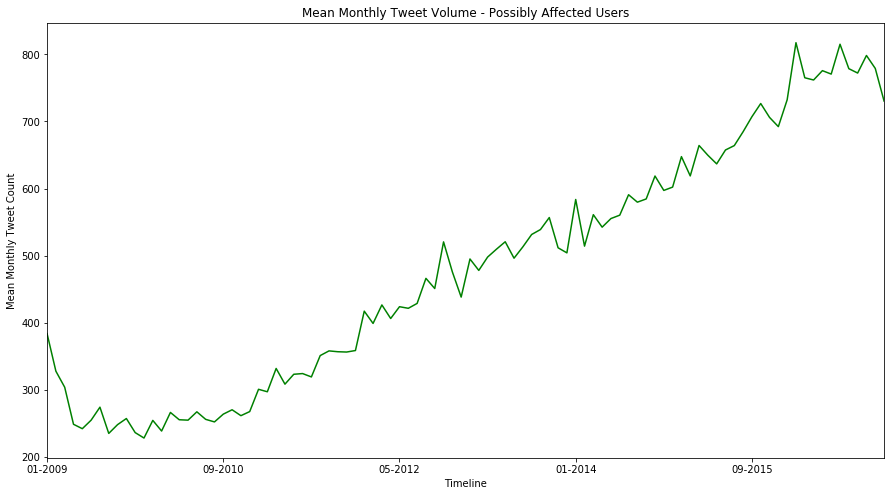

In [25]:
plt.figure()
tweet_countDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Mean Monthly Tweet Volume - Possibly Affected Users')
# plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Tweet Count')
plt.xlabel('Timeline')
# plt.savefig('PAU_graphics/pau_tweetcount.png')
plt.show()

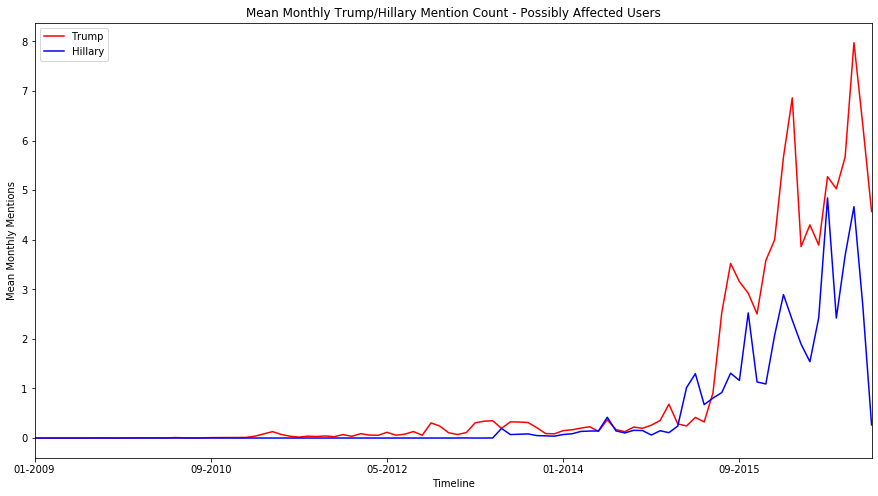

In [26]:
plt.figure()
trump_countDF.mean().plot(kind='line', color='red', figsize=(15,8),title='Mean Monthly Trump/Hillary Mention Count - Possibly Affected Users')
clinton_countDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Mentions')
# plt.savefig('PAU_graphics/pau_mentions.png')
plt.xlabel('Timeline')
plt.show()

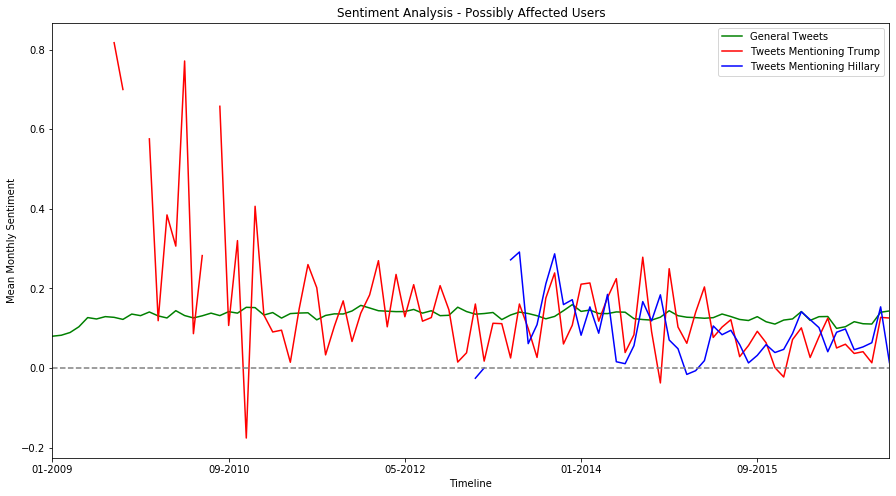

In [27]:
plt.figure()
sentiment_scoresDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Sentiment Analysis - Possibly Affected Users')
trump_sentDF.mean().plot(kind='line', color='red', figsize=(15,8))
clinton_sentDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('General Tweets','Tweets Mentioning Trump','Tweets Mentioning Hillary'))
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel('Mean Monthly Sentiment')
# plt.savefig('PAU_graphics/pau_sentiment.png')
plt.xlabel('Timeline')
plt.show()